In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
train_data_path = 'train'
validation_data_path = 'val'


In [3]:
# show augmentd images
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


In [4]:
# images augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_data = train_datagen.flow_from_directory(train_data_path,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='binary')  # since we use binary crossentropy loss, we nee binary labels



Found 1951 images belonging to 4 classes.


In [5]:
train_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [6]:
# data augmentation on validation dataset
# resccaling
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='binary')


Found 324 images belonging to 4 classes.


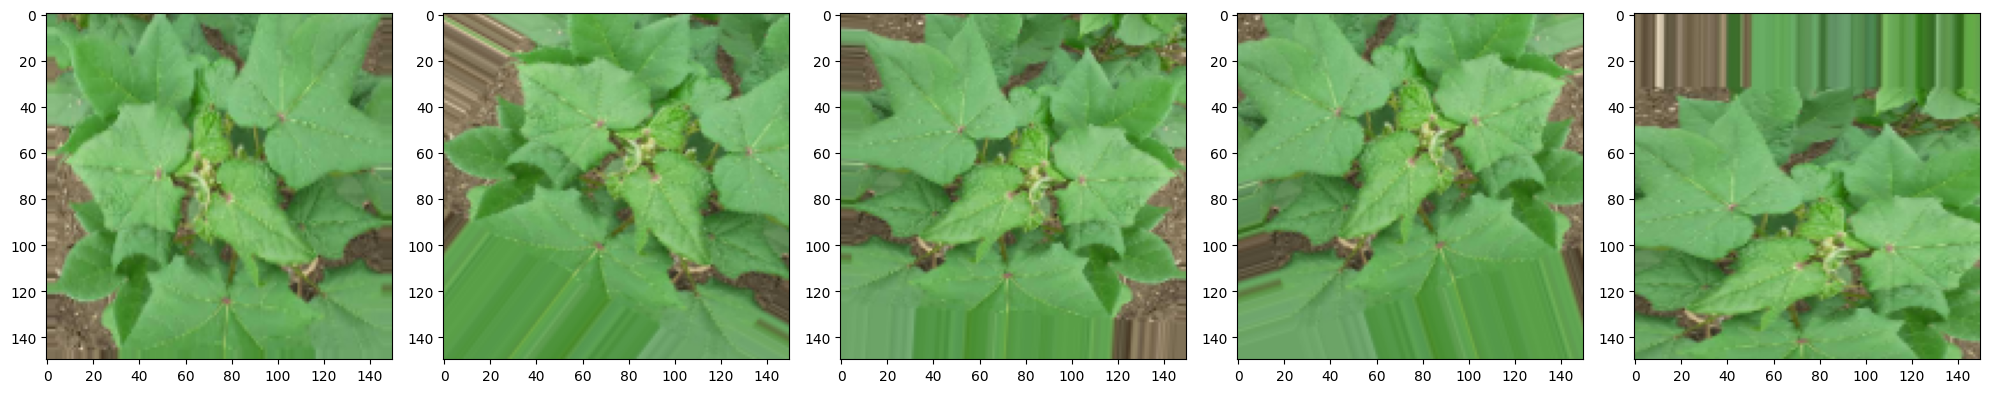

In [7]:
# show augmented images
image = [train_data[0][0][0] for i in range(5)]
plotImages(image)

In [8]:
# save best model
model_path='D:/CropPlantDiseasePrediction/model.h5'
checkpoint = ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callback_list = [checkpoint]

In [9]:
# model
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256,kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Dropout(0.5),
    keras.layers.Flatten(), 
    keras.layers.Dense(units=128,activation='relu'), #input layers
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=4,activation='softmax'),#output layer 
])

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [11]:
# train model
history = cnn_model.fit(train_data,
                        epochs=20,
                        verbose=1,
                        validation_data=valid_data,
                        callbacks=callback_list)

Epoch 1/20
61/61 [==============================] - ETA: 0s - loss: 1.2466 - accuracy: 0.4541
Epoch 1: val_accuracy improved from -inf to 0.54938, saving model to D:/CropPlantDiseasePrediction\model.h5
61/61 [==============================] - 51s 828ms/step - loss: 1.2466 - accuracy: 0.4541 - val_loss: 1.0736 - val_accuracy: 0.5494
Epoch 2/20


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/61 [==============================] - ETA: 0s - loss: 1.0434 - accuracy: 0.5592
Epoch 2: val_accuracy did not improve from 0.54938
61/61 [==============================] - 48s 786ms/step - loss: 1.0434 - accuracy: 0.5592 - val_loss: 1.1823 - val_accuracy: 0.4198
Epoch 3/20
61/61 [==============================] - ETA: 0s - loss: 0.9246 - accuracy: 0.6202
Epoch 3: val_accuracy improved from 0.54938 to 0.63889, saving model to D:/CropPlantDiseasePrediction\model.h5
61/61 [==============================] - 48s 787ms/step - loss: 0.9246 - accuracy: 0.6202 - val_loss: 0.8547 - val_accuracy: 0.6389
Epoch 4/20
61/61 [==============================] - ETA: 0s - loss: 0.8796 - accuracy: 0.6340
Epoch 4: val_accuracy did not improve from 0.63889
61/61 [==============================] - 47s 769ms/step - loss: 0.8796 - accuracy: 0.6340 - val_loss: 0.9027 - val_accuracy: 0.6080
Epoch 5/20
61/61 [==============================] - ETA: 0s - loss: 0.8324 - accuracy: 0.6735
Epoch 5: val_accuracy did 

In [14]:
model = 'D:\CropPlantDiseasePrediction\pred_model.h5'
cnn_model.save(model)

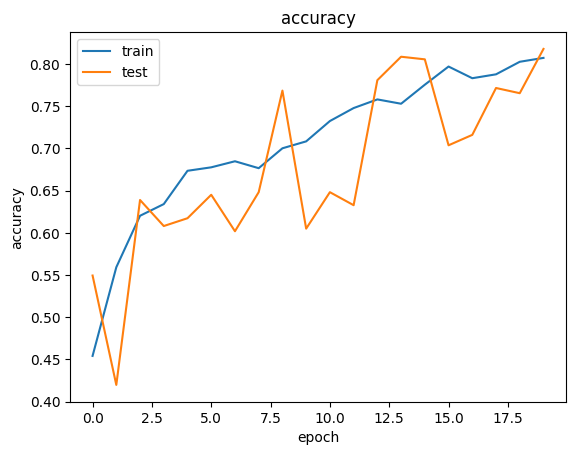

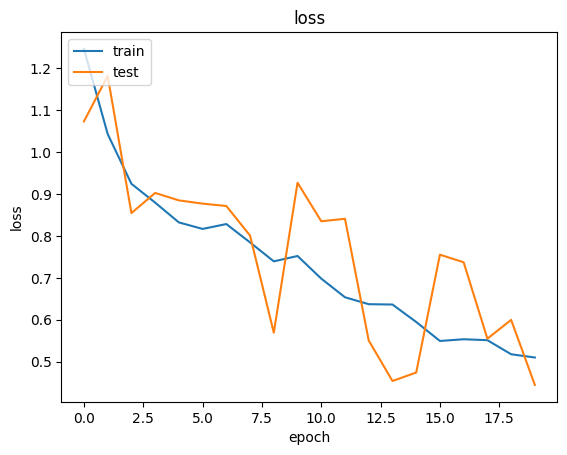

In [15]:
# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()


#### Model Prediction


In [16]:
import numpy as np
from keras import models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [17]:
model = models.load_model('D:/CropPlantDiseasePrediction/model.h5')

In [18]:
def model_predict(image):
  test_image = load_img(image, target_size = (150, 150)) # load image 
 
   
  test_image = img_to_array(test_image)/255 # convert image to np array and normalize
  test_image = np.expand_dims(test_image, axis = 0) # change dimention 3D to 4D
   
  result = model.predict(test_image) # predict diseased palnt or not
  
   
  pred = np.argmax(result) # get the index of max value
 
  if pred == 0:
    return "Healthy Cotton Plant" # if index 0 burned leaf
  elif pred == 1:
      return 'Diseased Cotton Plant' #  if index 1
  elif pred == 2:
      return 'Healthy Cotton Plant'  # if index 2  fresh leaf
  else:
    return "Healthy Cotton Plant" # if index 3
 

In [19]:
from PIL import Image  # You can use any library to load the image, like PIL or OpenCV



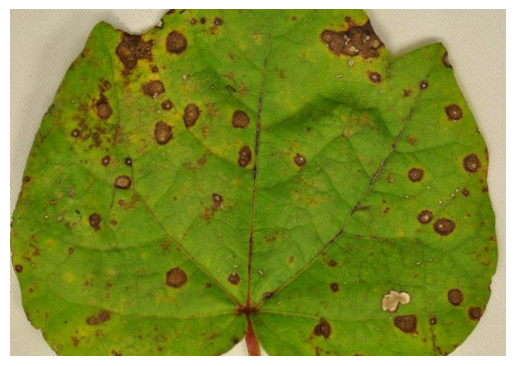

1/1 [==============================] - 0s 36ms/step
Diseased Cotton Plant


In [28]:
image = Image.open('img.jpg')

# Convert image to numpy array
image_array = np.array(image)

# Step 2: Plot the image
plt.imshow(image_array)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

preds = model_predict('img.jpg')
result=preds
print(result)

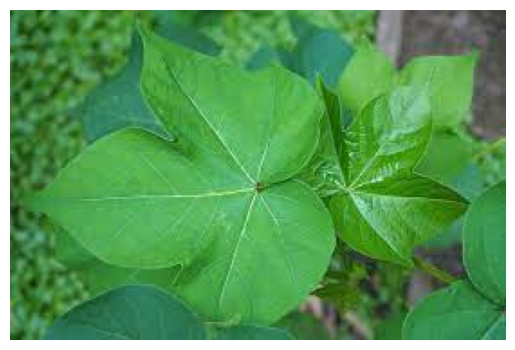

1/1 [==============================] - 0s 31ms/step
Healthy Cotton Plant


In [30]:
image = Image.open('img1.jpeg')

# Convert image to numpy array
image_array = np.array(image)

# Step 2: Plot the image
plt.imshow(image_array)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()
preds = model_predict('img1.jpeg')
result=preds
print(result)